<a href="https://colab.research.google.com/github/CodingDuckmx/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Jesus_CaballeroMedrano_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
# Your Work Here

from google.colab import files 
uploaded = files.upload()

Saving congress-terms.csv to congress-terms.csv


In [116]:
import pandas as pd


df = pd.read_csv('congress-terms.csv')

df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


In [126]:
df['year'] = pd.to_datetime(df['termstart'],infer_datetime_format=True).dt.year

df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9,1947
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2,1947
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7,1947
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8,1947
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3,1947


In [173]:
#Fisrt we select only the data required.
df3 = df[['party','year','age']]


#Define conditionals for the party they belong
conddem = (df['party'] == 'D')

condrep = (df['party'] == 'R')

#Build the df of each party

tabledem = df[conddem][['year','age']]
tablerep = df[condrep][['year','age']]

#Then make a pivot table to obtain the main values, for each df.

meanagesdem = pd.pivot_table(tabledem, values='age', index='year', aggfunc='mean')

meanagesrep = pd.pivot_table(tablerep, values='age', index='year', aggfunc='mean')

print(meanagesdem.head())


print(meanagesrep.head())

            age
year           
1947  52.006883
1949  51.430303
1951  52.295890
1953  52.258029
1955  52.254861
            age
year           
1947  52.969608
1949  54.603571
1951  54.330268
1953  54.088571
1955  54.737945


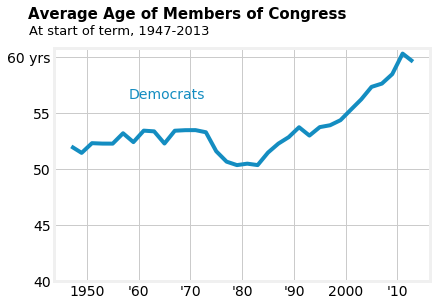

In [244]:
#plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#I tried to change the font with no success. 
# from matplotlib import rcParams

# rcParams['font.family']='sans-serif'
# rcParams['font.sans-serif']=['Verdana']


plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(meanagesdem.index,meanagesdem['age'], color ='#148DC1')


#title

ax.set_title('Average Age of Members of Congress',
             loc='left',
             color='black',
             fontsize=15,
             fontweight='demibold',
             x=-0.07,
             y=1.1)

#subtitle

fig.suptitle('At start of term, 1947-2013',
             x=0.23,
             y=0.96,
             fontsize=13)

# text(0.26, 3, s='Democrats',
#              fontsize=13,
#              color='C6')

#set x axis ticks

ax.set_xticks(range(1950,2020,10))

# x axis tick labels
ax.set_xticklabels(labels=["1950","'60","'70","'80","'90","2000","'10"])


#set y axis ticks

ax.set_yticks(range(40,65,5))

#y axis tick labels
ax.set_yticklabels(labels=["40","45","50","55","60 yrs"])

# set figure background color
fig.set_facecolor(color="white")
ax.set_facecolor(color='white')


fig.text(0.3, 0.8, 'Democrats', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, color= '#148DC1')

plt.show()

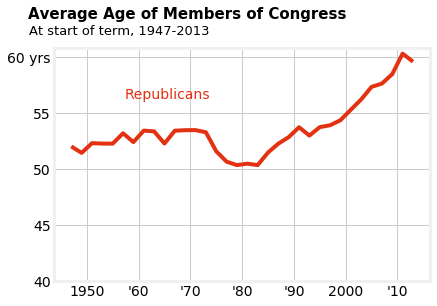

In [243]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(meanagesrep.index,meanagesdem['age'], color='#E33212')


#title

ax.set_title('Average Age of Members of Congress',
             loc='left',
             color='black',
             fontsize=15,
             fontweight='demibold',
             x=-0.07,
             y=1.1)

#subtitle

fig.suptitle('At start of term, 1947-2013',
             x=0.23,
             y=0.96,
             fontsize=13)

# text(0.26, 3, s='Democrats',
#              fontsize=13,
#              color='C6')

#set x axis ticks

ax.set_xticks(range(1950,2020,10))

# x axis tick labels
ax.set_xticklabels(labels=["1950","'60","'70","'80","'90","2000","'10"])


#set y axis ticks

ax.set_yticks(range(40,65,5))

#y axis tick labels
ax.set_yticklabels(labels=["40","45","50","55","60 yrs"])

# set figure background color
fig.set_facecolor(color="white")
ax.set_facecolor(color='white')




fig.text(0.3, 0.8, 'Republicans', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, color= '#E33212')

plt.show()

In [245]:
 repdata = meanagesrep.reset_index()

 repdata.head()

 demdata = meanagesdem.reset_index()

demdata.head()

globaldata = demdata.merge(repdata, on = 'year')

globaldata.head()

# fig, ax = plt.subplots()
# ax.plot(globaldata[['year','age_x']],globaldata[['year','age_y']])


# plt.show()


,year,age_x,age_y
0,1947,52.006883,52.969608
1,1949,51.430303,54.603571
2,1951,52.295890,54.330268
3,1953,52.258029,54.088571
4,1955,52.254861,54.737945


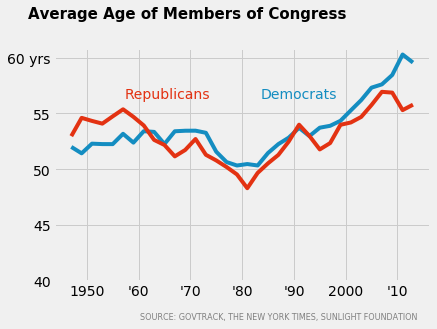

In [258]:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

x = globaldata['year']
y1= globaldata['age_x']
y2= globaldata['age_y']


ax.plot(x,y1, color='#148DC1')
ax.plot(x,y2, color='#E33212' )


#title

ax.set_title('Average Age of Members of Congress',
             loc='left',
             color='black',
             fontsize=15,
             fontweight='demibold',
             x=-0.07,
             y=1.1)

#subtitle

fig.suptitle('At start of term, 1947-2013',
             x=0.23,
             y=0.96,
             fontsize=13)

# text(0.26, 3, s='Democrats',
#              fontsize=13,
#              color='C6')

#set x axis ticks

ax.set_xticks(range(1950,2020,10))

# x axis tick labels
ax.set_xticklabels(labels=["1950","'60","'70","'80","'90","2000","'10"])


#set y axis ticks

ax.set_yticks(range(40,65,5))

#y axis tick labels
ax.set_yticklabels(labels=["40","45","50","55","60 yrs"])

# set figure background color
# fig.set_facecolor(color="white")
# ax.set_facecolor(color='white')




fig.text(0.3, 0.8, 'Republicans', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, color= '#E33212')

fig.text(0.65, 0.8, 'Democrats', horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, color= '#148DC1')



fig.suptitle('SOURCE: GOVTRACK, THE NEW YORK TIMES, SUNLIGHT FOUNDATION', x=0.6, y=-0.04, fontsize=8, color ='gray')

plt.show()





# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here